In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df=pd.read_csv('Employee.csv')
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


### <span style='color:Red'>**Data Exploration**</span>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [4]:
df.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [5]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [6]:
df.tail()

,Company,Age,Salary,Place,Country,Gender
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1
147,Infosys,22.0,8202.0,Cochin,India,0


In [7]:
df.describe(include='all')

,Company,Age,Salary,Place,Country,Gender
count,140,130.000000,124.000000,134,148,148.000000
unique,6,NaN,NaN,11,1,NaN
top,TCS,NaN,NaN,Mumbai,India,NaN
freq,53,NaN,NaN,37,148,NaN
mean,NaN,30.484615,5312.467742,NaN,NaN,0.222973
std,NaN,11.096640,2573.764683,NaN,NaN,0.417654
min,NaN,0.000000,1089.000000,NaN,NaN,0.000000
25%,NaN,22.000000,3030.000000,NaN,NaN,0.000000
50%,NaN,32.500000,5000.000000,NaN,NaN,0.000000
75%,NaN,37.750000,8000.000000,NaN,NaN,0.000000


In [8]:
df.dtypes

Company     object
Age        float64
Salary     float64
Place       object
Country     object
Gender       int64
dtype: object

In [9]:
df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

There are null values in columns 'Company','Age','Salary' and 'Place'

In [10]:
#Renaming column name 'Place' to 'City'
df.rename(columns={'Place':'City'}, inplace=True)
df

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [11]:
print("Unique values in each feature and its length:\n")
for column in df.columns:
    unique_values=df[column].unique()
    print(f"{column}:{unique_values} (length : {len(unique_values)})")  


Unique values in each feature and its length:

Company:['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt'] (length : 7)
Age:[20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.] (length : 30)
Salary:[  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.] (length : 41)
City:['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune'] (length : 12)
Country:['India'] (length : 1)
Gender:[0 1] (length : 2)


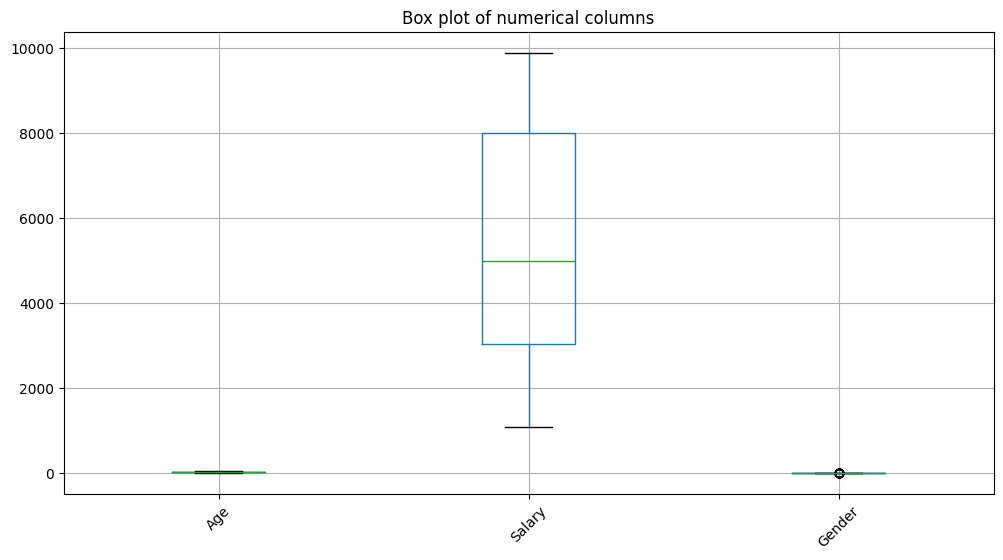

In [12]:
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title('Box plot of numerical columns')
plt.xticks(rotation=45)
plt.show()

From the above boxplor,there is no outliers present in the numerical column

### <span style='color:red'>**Data Cleaning**</span>

In [13]:
#find the number of duplicate rows
df.duplicated().value_counts()

False    144
True       4
Name: count, dtype: int64

In [14]:
#Drop duplicate rows
df=df.drop_duplicates()
df

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [15]:
df['Age'].isnull().value_counts()

Age
False    127
True      17
Name: count, dtype: int64

There are 17 null values in 'Age'

In [16]:
value_counts=(df['Age']==0).value_counts()
value_counts

Age
False    138
True       6
Name: count, dtype: int64

In [17]:
# There are 6 zero values present in the Age column. Replace the value of 0 with NaN
df['Age']=df['Age'].replace(0,np.NaN)
df

C:\Users\hp\AppData\Local\Temp\ipykernel_9940\1093057301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age']=df['Age'].replace(0,np.NaN)


,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [18]:
mean_age=math.ceil(df['Age'].mean())
mean_age

33

In [19]:
#Replace the NAN value in Age column with the mean value of age
df['Age']=df['Age'].replace(np.NaN,mean_age)
df

C:\Users\hp\AppData\Local\Temp\ipykernel_9940\3644085236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age']=df['Age'].replace(np.NaN,mean_age)


,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [20]:
df['Company'].isnull().value_counts()

Company
False    136
True       8
Name: count, dtype: int64

In [21]:
mode=df['Company'].mode()[0]
mode

'TCS'

In [22]:
null_companies=df[df['Company'].isnull()]
null_companies

,Company,Age,Salary,City,Country,Gender
37,NaN,35.0,NaN,Hyderabad,India,0
51,NaN,24.0,3000.0,Mumbai,India,0
61,NaN,25.0,8943.0,NaN,India,1
64,NaN,25.0,6543.0,Noida,India,0
109,NaN,33.0,NaN,Calcutta,India,0
123,NaN,33.0,3454.0,Calcutta,India,0
133,NaN,22.0,8943.0,Chennai,India,0
136,NaN,33.0,NaN,Delhi,India,0


In [23]:
# Replace the NaN value in the Company column with the mode value
df['Company']=df['Company'].replace(np.NaN,mode)
df

C:\Users\hp\AppData\Local\Temp\ipykernel_9940\1716008111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Company']=df['Company'].replace(np.NaN,mode)


,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [24]:
df['Salary'].isnull().value_counts()

Salary
False    121
True      23
Name: count, dtype: int64

In [25]:
null_salary=df[df['Salary'].isnull()]
null_salary

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
10,CTS,23.0,NaN,Mumbai,India,0
12,CTS,45.0,NaN,Chennai,India,0
18,TCS,22.0,NaN,Chennai,India,0
19,Infosys,32.0,NaN,Mumbai,India,0
36,TCS,32.0,NaN,Noida,India,0
37,TCS,35.0,NaN,Hyderabad,India,0
46,CTS,24.0,NaN,Calcutta,India,0
48,CTS,43.0,NaN,Mumbai,India,0


In [26]:
#Find the mean value of Salary
mean_salary=df['Salary'].mean()
mean_salary

5283.471074380165

In [27]:
#Replace NaN in the Salary with the mean value
df['Salary']=df['Salary'].replace(np.NaN,mean_salary)
df

C:\Users\hp\AppData\Local\Temp\ipykernel_9940\835353941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary']=df['Salary'].replace(np.NaN,mean_salary)


,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,5283.471074,Chennai,India,0
1,Infosys,30.0,5283.471074,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.000000,Mumbai,India,0
143,TCS,33.0,9024.000000,Calcutta,India,1
145,Infosys,44.0,4034.000000,Delhi,India,1
146,TCS,33.0,5034.000000,Mumbai,India,1


In [28]:
df['City'].isnull().value_counts()

City
False    130
True      14
Name: count, dtype: int64

In [29]:
df['City'].value_counts()

City
Mumbai        34
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

In [30]:
#Find the mode of city
mode_city=df['City'].mode()[0]
mode_city

'Mumbai'

In [31]:
#Replace NaN in city with the mode 
df['City']=df['City'].replace(np.NaN,mode_city)
df

C:\Users\hp\AppData\Local\Temp\ipykernel_9940\2480632738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City']=df['City'].replace(np.NaN,mode_city)


,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,5283.471074,Chennai,India,0
1,Infosys,30.0,5283.471074,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.000000,Mumbai,India,0
143,TCS,33.0,9024.000000,Calcutta,India,1
145,Infosys,44.0,4034.000000,Delhi,India,1
146,TCS,33.0,5034.000000,Mumbai,India,1


### <span style='color:red'>**Data Analysis**</span>

In [32]:
# Filter the data with age >40 and salary<5000
filtered_data=df[(df['Age']>40) & (df['Salary']<5000)]
filtered_data

,Company,Age,Salary,City,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


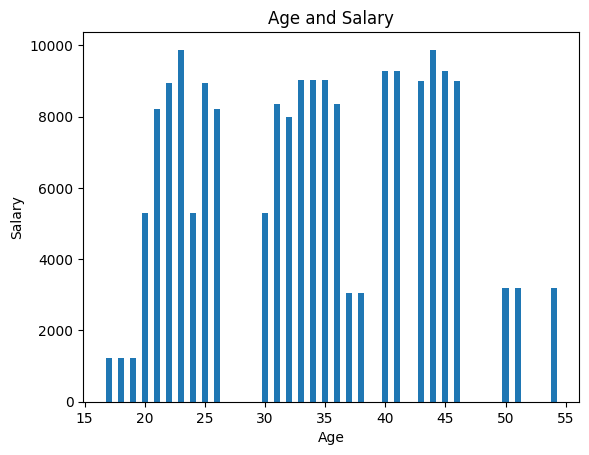

In [33]:
# Plot the chart with age and salary
plt.bar(df['Age'],df['Salary'],width=0.5)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age and Salary')
plt.show()

In [34]:
# Count the number of people from each place and represent it visually
people_count=df['City'].value_counts()
people_count

City
Mumbai        48
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

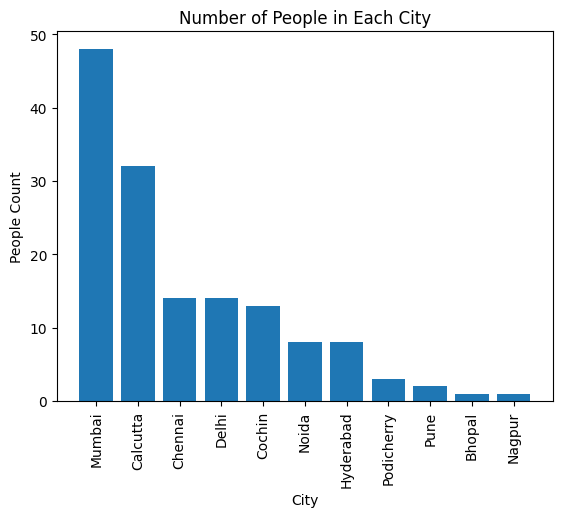

In [35]:
plt.bar(people_count.index, people_count)
plt.xlabel('City')
plt.xticks(rotation=90)
plt.ylabel('People Count')
plt.title('Number of People in Each City')
plt.show()

### <span style='color:red'>**Data Encoding**</span>

The categorical variables that need to be converted into numerical variables are 'Company', 'City', and 'Country'.

#### ***ONE HOT ENCODING***

In [36]:
#Using get_dummies function
df_one_hot_encoded=pd.get_dummies(data=df,columns=["Company","City","Country"])
print(df_one_hot_encoded)                                 

      Age       Salary  Gender  Company_CTS  Company_Congnizant  \
0    20.0  5283.471074       0        False               False   
1    30.0  5283.471074       0        False               False   
2    35.0  2300.000000       0        False               False   
3    40.0  3000.000000       0        False               False   
4    23.0  4000.000000       0        False               False   
..    ...          ...     ...          ...                 ...   
142  22.0  8202.000000       0        False               False   
143  33.0  9024.000000       1        False               False   
145  44.0  4034.000000       1        False               False   
146  33.0  5034.000000       1        False               False   
147  22.0  8202.000000       0        False               False   

     Company_Infosys  Company_Infosys Pvt Lmt  Company_TCS  \
0              False                    False         True   
1               True                    False        False   
2        

In [37]:
pip install scikit-learn

In [39]:
pip show scikit=learn

Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [238]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [41]:
#Using onehotencoder function
from sklearn.preprocessing import OneHotEncoder

cols_to_encode=["Company","City","Country"]
new_encoded_cols=[]

# Create a list of new columns names
for col in cols_to_encode:
    new_encoded_cols+= [f"is_{category}" for category in df[col].unique().tolist()]

print(new_encoded_cols)
#['is_TCS', 'is_Infosys', 'is_CTS', 'is_Congnizant', 'is_Chennai', 'is_Mumbai', 'is_Calcutta', 'is_Delhi', 'is_Podicherry', 'is_Cochin', 'is_Noida', 'is_Hyderabad', 'is_Bhopal', 'is_Nagpur', 'is_Pune', 'is_India']


#Initialize and fit OneHotEncoder from class sklearn
one_hot_encoder= OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cols=one_hot_encoder.fit_transform(df[cols_to_encode])
print(encoded_cols)

# As the output of the above transformer would be a sparse matrix, we need to convert it back to Pandas dataframe
df_encoded=pd.DataFrame(encoded_cols,columns=new_encoded_cols)
print(df_encoded)
df_one_hot_encoded=df.join(df_encoded)

print(df_one_hot_encoded)

['is_TCS', 'is_Infosys', 'is_CTS', 'is_Tata Consultancy Services', 'is_Congnizant', 'is_Infosys Pvt Lmt', 'is_Chennai', 'is_Mumbai', 'is_Calcutta', 'is_Delhi', 'is_Podicherry', 'is_Cochin', 'is_Noida', 'is_Hyderabad', 'is_Bhopal', 'is_Nagpur', 'is_Pune', 'is_India']
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]]
     is_TCS  is_Infosys  is_CTS  is_Tata Consultancy Services  is_Congnizant  \
0       0.0         0.0     0.0                           0.0            1.0   
1       0.0         0.0     1.0                           0.0            0.0   
2       0.0         0.0     0.0                           0.0            1.0   
3       0.0         0.0     1.0                           0.0            0.0   
4       0.0         0.0     0.0                           0.0            1.0   
..      ...         ...     ...                           ...            ...   
139     0.0      

#### ***LABEL ENCODING***

In [42]:
from sklearn.preprocessing import LabelEncoder

cols_to_encode=("Company","City","Country")

#Label_encoder is the object of LabelEncoder
label_encoder=LabelEncoder()

#Initialize a new DataFrame to store encoded columns
df_label_encoded = df.copy()

# Encode each column in cols_to_encode
for cols in cols_to_encode:
    df_label_encoded[col]=label_encoder.fit_transform(df[col])
print(df_label_encoded)


             Company   Age       Salary      City  Country  Gender
0                TCS  20.0  5283.471074   Chennai        0       0
1            Infosys  30.0  5283.471074    Mumbai        0       0
2                TCS  35.0  2300.000000  Calcutta        0       0
3            Infosys  40.0  3000.000000     Delhi        0       0
4                TCS  23.0  4000.000000    Mumbai        0       0
..               ...   ...          ...       ...      ...     ...
142  Infosys Pvt Lmt  22.0  8202.000000    Mumbai        0       0
143              TCS  33.0  9024.000000  Calcutta        0       1
145          Infosys  44.0  4034.000000     Delhi        0       1
146              TCS  33.0  5034.000000    Mumbai        0       1
147          Infosys  22.0  8202.000000    Cochin        0       0

[144 rows x 6 columns]


### <span style='color:red'>**Feature Scaling**</span>

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range.

#### 1. ***STANDARD SCALER***

In [44]:
from sklearn.preprocessing import StandardScaler

columns_to_scale=df[["Age","Salary"]]

#Create a scaler object
scaler=StandardScaler()

#Fit the scaler on the data
scaler.fit(columns_to_scale)

#Tranform the data
scaled_data=scaler.transform(columns_to_scale)

#Convert scaled data to DataFrrame
scaled_df=pd.DataFrame(scaled_data,columns=["Age","Salary"])

# Initialize a new DataFrame to store after applying standard scaler
df_standard = df.copy()

#Replace Scaled columns in original dataframe
df_standard[["Age","Salary"]]=scaled_df

# Print the DataFrame with scaled columns replaced by original values
print(df_standard)

             Company       Age    Salary      City Country  Gender
0                TCS -1.484676  0.000000   Chennai   India       0
1            Infosys -0.267174  0.000000    Mumbai   India       0
2                TCS  0.341577 -1.264122  Calcutta   India       0
3            Infosys  0.950328 -0.967526     Delhi   India       0
4                TCS -1.119426 -0.543818    Mumbai   India       0
..               ...       ...       ...       ...     ...     ...
142  Infosys Pvt Lmt  0.098077 -0.105703    Mumbai   India       0
143              TCS -1.241176  1.236606  Calcutta   India       1
145          Infosys       NaN       NaN     Delhi   India       1
146              TCS       NaN       NaN    Mumbai   India       1
147          Infosys       NaN       NaN    Cochin   India       0

[144 rows x 6 columns]


In [45]:
#dataframe after label encoding & standard scaling

# Initialize a new DataFrame to store after applying standard scaler
df_standard = df_label_encoded.copy()

# Replace scaled columns in the original DataFrame
df_standard[['Age', 'Salary']] = scaled_df

# Print the DataFrame with scaled columns replaced by original values
print(df_standard)

             Company       Age    Salary      City  Country  Gender
0                TCS -1.484676  0.000000   Chennai        0       0
1            Infosys -0.267174  0.000000    Mumbai        0       0
2                TCS  0.341577 -1.264122  Calcutta        0       0
3            Infosys  0.950328 -0.967526     Delhi        0       0
4                TCS -1.119426 -0.543818    Mumbai        0       0
..               ...       ...       ...       ...      ...     ...
142  Infosys Pvt Lmt  0.098077 -0.105703    Mumbai        0       0
143              TCS -1.241176  1.236606  Calcutta        0       1
145          Infosys       NaN       NaN     Delhi        0       1
146              TCS       NaN       NaN    Mumbai        0       1
147          Infosys       NaN       NaN    Cochin        0       0

[144 rows x 6 columns]


In [46]:
#dataframe after OneHotEncoding & standard scaling

# Initialize a new DataFrame to store after applying standard scaler
df_standard = df_one_hot_encoded.copy()

# Replace scaled columns in the original DataFrame
df_standard[['Age', 'Salary']] = scaled_df

# Print the DataFrame with scaled columns replaced by original values
print(df_standard)


             Company       Age    Salary      City Country  Gender  is_TCS  \
0                TCS -1.484676  0.000000   Chennai   India       0     0.0   
1            Infosys -0.267174  0.000000    Mumbai   India       0     0.0   
2                TCS  0.341577 -1.264122  Calcutta   India       0     0.0   
3            Infosys  0.950328 -0.967526     Delhi   India       0     0.0   
4                TCS -1.119426 -0.543818    Mumbai   India       0     0.0   
..               ...       ...       ...       ...     ...     ...     ...   
142  Infosys Pvt Lmt  0.098077 -0.105703    Mumbai   India       0     0.0   
143              TCS -1.241176  1.236606  Calcutta   India       1     0.0   
145          Infosys       NaN       NaN     Delhi   India       1     NaN   
146              TCS       NaN       NaN    Mumbai   India       1     NaN   
147          Infosys       NaN       NaN    Cochin   India       0     NaN   

     is_Infosys  is_CTS  is_Tata Consultancy Services  ...  is_

#### 2. ***MINMAX SCALER***

In [47]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale=df[["Age","Salary"]]

#Create scaler object
scaler=MinMaxScaler()

#Fit the scaler on the data
scaler.fit(cols_to_scale)

#Transform the data
scaled_data=scaler.transform(cols_to_scale)

#Convert the scaled data to DataFrame
scaled_df=pd.DataFrame(scaled_data, columns=["Age","Salary"])

# Initialize a new DataFrame to store after applying standard scaler
df_minmax=df.copy()

# Replace scaled columns in the original DataFrame
df_minmax[["Age","Salary"]]=scaled_df

# Print the DataFrame with scaled columns replaced by original values
print(df_minmax)

             Company       Age    Salary      City Country  Gender
0                TCS  0.081081  0.477350   Chennai   India       0
1            Infosys  0.351351  0.477350    Mumbai   India       0
2                TCS  0.486486  0.137817  Calcutta   India       0
3            Infosys  0.621622  0.217480     Delhi   India       0
4                TCS  0.162162  0.331285    Mumbai   India       0
..               ...       ...       ...       ...     ...     ...
142  Infosys Pvt Lmt  0.432432  0.448959    Mumbai   India       0
143              TCS  0.135135  0.809491  Calcutta   India       1
145          Infosys       NaN       NaN     Delhi   India       1
146              TCS       NaN       NaN    Mumbai   India       1
147          Infosys       NaN       NaN    Cochin   India       0

[144 rows x 6 columns]


In [48]:
#dataframe after label encoding & minmax scaling

# Initialize a new DataFrame to store after applying standard scaler
df_minmax = df_label_encoded.copy()

# Replace scaled columns in the original DataFrame
df_minmax[['Age', 'Salary']] = scaled_df

# Print the DataFrame with scaled columns replaced by original values
print(df_minmax)

             Company       Age    Salary      City  Country  Gender
0                TCS  0.081081  0.477350   Chennai        0       0
1            Infosys  0.351351  0.477350    Mumbai        0       0
2                TCS  0.486486  0.137817  Calcutta        0       0
3            Infosys  0.621622  0.217480     Delhi        0       0
4                TCS  0.162162  0.331285    Mumbai        0       0
..               ...       ...       ...       ...      ...     ...
142  Infosys Pvt Lmt  0.432432  0.448959    Mumbai        0       0
143              TCS  0.135135  0.809491  Calcutta        0       1
145          Infosys       NaN       NaN     Delhi        0       1
146              TCS       NaN       NaN    Mumbai        0       1
147          Infosys       NaN       NaN    Cochin        0       0

[144 rows x 6 columns]


In [49]:
#dataframe after OneHotEncoding & minmax scaling

# Initialize a new DataFrame to store after applying standard scaler
df_minmax = df_one_hot_encoded.copy()

# Replace scaled columns in the original DataFrame
df_minmax[['Age', 'Salary']] = scaled_df

# Print the DataFrame with scaled columns replaced by original values
print(df_minmax)

             Company       Age    Salary      City Country  Gender  is_TCS  \
0                TCS  0.081081  0.477350   Chennai   India       0     0.0   
1            Infosys  0.351351  0.477350    Mumbai   India       0     0.0   
2                TCS  0.486486  0.137817  Calcutta   India       0     0.0   
3            Infosys  0.621622  0.217480     Delhi   India       0     0.0   
4                TCS  0.162162  0.331285    Mumbai   India       0     0.0   
..               ...       ...       ...       ...     ...     ...     ...   
142  Infosys Pvt Lmt  0.432432  0.448959    Mumbai   India       0     0.0   
143              TCS  0.135135  0.809491  Calcutta   India       1     0.0   
145          Infosys       NaN       NaN     Delhi   India       1     NaN   
146              TCS       NaN       NaN    Mumbai   India       1     NaN   
147          Infosys       NaN       NaN    Cochin   India       0     NaN   

     is_Infosys  is_CTS  is_Tata Consultancy Services  ...  is_